### Import packages

In [1]:
import glob, os
import numpy as np
import geopandas as gpd
import rasterio
import rasterio.mask
import rasterio.plot
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
from pathlib import Path
import rasterstats
from rasterstats import zonal_stats
import datetime
from IPython.display import display
import pandas as pd

print('All libraries successfully imported!')
print(f'Rasterstats : {rasterstats.__version__}')



All libraries successfully imported!
Rasterstats : 0.16.0


## Set directory

In [3]:
work_path = f'/export/homes/students/rkahn/EXPORT/'
roi = f'{work_path}ROI/extent_roi.shp'
raster_file = f'{work_path}CARTES_TIF/'
vector_file = f'{work_path}ROI/extent_roi.shp'
zonal_stat_path = f'{work_path}ZONAL_STATS/'
zonal_stat_SM_csv  = f'{zonal_stat_path}zonal_stat_cont_SM.csv'

### Check CRS

In [4]:
import warnings
warnings.filterwarnings("ignore")

raster_file_list = sorted(glob.glob(f'{raster_file}*.tif'))
print('Raster files timeseries :')
for raster_file in raster_file_list:
    print(raster_file)
print('vectorfile',vector_file)

gdf = gpd.read_file(vector_file)
display(gdf)
src = rasterio.open(raster_file_list[0], "r")
print(src)

crs_vector = str(gdf.crs).split(":",1)[1]
crs_raster = str(src.crs).split(":",1)[1]

if crs_vector == crs_raster:
    print(f'CRS are the same : EPSG:{crs_vector} = EPSG:{crs_raster}')
else:
    print('We must reproject vector file')

    gdf = gdf.to_crs(epsg=crs_raster)

Raster files timeseries :
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201901.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201902.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201903.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201904.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201905.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201906.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201907.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201908.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201909.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201910.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201911.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201912.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_202001.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_202002.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_202003.tif
/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_202004.ti

,NAME,LAYER,STREAM_ID,NEXT_STREA,geometry
0,ITCHEDJIRO,Watershed,203,202,"POLYGON ((412606.310 882972.967, 412636.958 88..."


<open DatasetReader name='/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201901.tif' mode='r'>
CRS are the same : EPSG:32631 = EPSG:32631


#### Display the first SM tif

/export/homes/students/rkahn/EXPORT/CARTES_TIF/SM_201901.tif


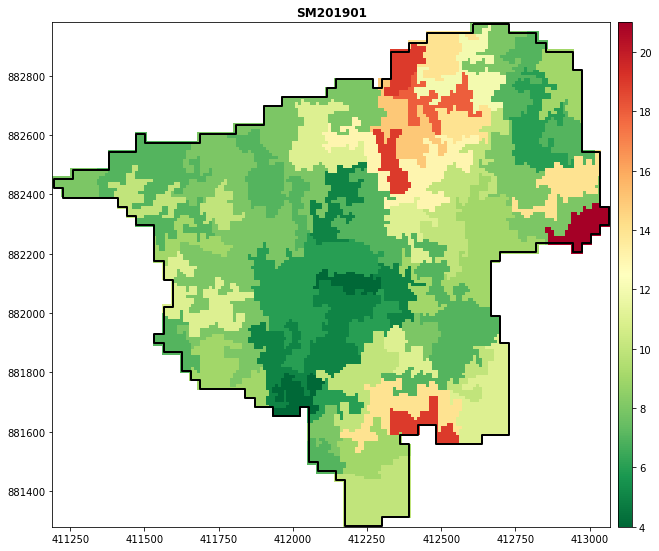

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# Plot vector
gdf.plot(facecolor='none', edgecolor='black', linewidth = 2, ax=ax)

# Plot image
color_map = plt.cm.get_cmap("RdYlGn")
reversed_color_map = color_map.reversed()

src = rasterio.open(raster_file_list[0], "r")
im_rio = rasterio.plot.show(src, cmap=reversed_color_map, ax=ax, title="SM201901")
im_rio = im_rio.get_images()[0]
#vmin=0.153305 et vmax=0.502776
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im_rio, ax=ax, cax=cax)
plt.box(False)
print(raster_file_list[0])

### Check all tif

In [6]:
format     = '%Y%m' # format : YYYYMM
dict_list = []
for im in raster_file_list:
            
        date_str = os.path.basename(im)[3:-4]
        print(date_str)
        date_im = datetime.datetime.strptime(date_str, format).date()
        # date_im.to_csv(zonal_stat_csv)
        dict_list.append({'date': date_im,
                            'im_path': im})

im_date_path_df = pd.DataFrame.from_dict(dict_list).sort_values('date')

display(im_date_path_df)
# im_date_path_df.to_csv(zonal_stat_csv)
# print(f'CSV file was created : {zonal_stat_csv}')

201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203


,date,im_path
0,2019-01-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
1,2019-02-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
2,2019-03-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
3,2019-04-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
4,2019-05-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
5,2019-06-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
6,2019-07-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
7,2019-08-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
8,2019-09-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...
9,2019-10-01,/export/homes/students/rkahn/EXPORT/CARTES_TIF...


### Calculate zonal statistique from the delimited segments

In [35]:
# Function to calculate the mean value with NaN value's = -10000 in order to point out the cloud pixels
def mean_div_std(x):
    nonan = np.nanmean(x)
    return nonan

df_list = []
date_list = []

for i, row in im_date_path_df.iterrows():
    im         = row['im_path']
    long_date  = row['date']

    day   = str(long_date)[8:10]
    month = str(long_date)[5:7]
    year  = str(long_date)[0:4]
    
    print(long_date)

    date_list.append(long_date)

    date = month + year  # Year at the end because it will be truncated when saved to ESRI Shapefile

    # Open GeoTIFF file
    src = rasterio.open(im, 'r')
    im_arr = src.read(1)
    
    #Change NaN by "nodata_val"
    im_arr = np.nan_to_num(im_arr, nan=nodata_val)

    # Get transform from profile (metadata)
    profile = src.profile
    transform = profile['transform']
    
    src.close()

    df = pd.DataFrame(zonal_stats(gdf,
                                  im_arr,
                                  affine=transform,
                                  stats=['nodata','mean','std','median'],
                                  nodata=-100000,
                                  add_stats={'mean_without_nan_':mean_div_std}
                                  ))
    
    df = df.rename(columns={'nodata': f'nan___{date}','mean': f'mean__{date}','median': f'median__{date}','std': f'std___{date}', 'mean_div_std':f'mean_without_nan_{date}'})

    df[f'nan___{date}'] = df[f'nan___{date}'].fillna(0)
    df = df.astype({f'nan___{date}': float, f'median__{date}': float})
    
    df_list.append(df)

dfs = pd.concat(df_list, axis=1).round(4)

dfs.to_csv(zonal_stat_SM_csv)
print(f'CSV file was created : {zonal_stat_SM_csv}')

display(dfs)


2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01
2019-12-01
2020-01-01
2020-02-01
2020-03-01
2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01
2021-01-01
2021-02-01
2021-03-01
2021-04-01
2021-05-01
2021-06-01
2021-07-01
2021-08-01
2021-09-01
2021-10-01
2021-11-01
2021-12-01
2022-01-01
2022-02-01
2022-03-01
CSV file was created : /export/homes/students/rkahn/EXPORT/ZONAL_STATS/zonal_stat_cont_SM.csv


,mean__012019,std___012019,median__012019,nan___012019,mean_without_nan_,mean__022019,std___022019,median__022019,nan___022019,mean_without_nan_,...,mean__022022,std___022022,median__022022,nan___022022,mean_without_nan_,mean__032022,std___032022,median__032022,nan___032022,mean_without_nan_
0,9.2153,3.392,8.0,0.0,9.2153,8.3029,3.2996,8.0,0.0,8.3029,...,6.8736,2.8653,6.0,0.0,6.8736,7.4908,3.7351,7.0,0.0,7.4908


### Rearranging rows and columns + exportation

In [53]:
from statistics import median
def mean_div_std(x):
    nonan = np.nanmean(x)
    return nonan

df_list = []
date_list = []

for i, row in im_date_path_df.iterrows():
    im         = row['im_path']
    long_date  = row['date']

    day   = str(long_date)[8:10]
    month = str(long_date)[5:7]
    year  = str(long_date)[0:4]
    
    #print(long_date)

    date_list.append(long_date)
    # Open GeoTIFF file
    src = rasterio.open(im, 'r')
    im_arr = src.read(1)

        #Change NaN by "nodata_val"
    im_arr = np.nan_to_num(im_arr, nan=nodata_val)

    # Get transform from profile (metadata)
    profile = src.profile
    transform = profile['transform']
    
    src.close()

    df = pd.DataFrame(zonal_stats(gdf,
                                  im_arr,
                                  affine=transform,
                                  stats=['std','median','mean'],
                                  nodata=-10000,
                                  #add_stats={'mean_without_nan_':mean_div_std}
                                  ))
    
    df_list.append(df)
    
dfs = pd.concat(df_list, axis=0).round(2)
display(dfs)

dfs.to_csv(zonal_stat_SM_csv) #exportation in order to compare with smap in excel

print(f'CSV file was created : {zonal_stat_SM_csv}')

,mean,std,median
0,9.22,3.39,8.0
0,8.30,3.30,8.0
0,9.09,3.56,8.0
0,12.42,3.41,12.0
0,-984.81,119.34,-999.0
0,25.69,1.65,26.0
0,-897.39,306.25,-999.0
0,-245.72,451.44,24.0
0,-18.06,204.45,25.0
0,25.13,2.28,26.0


CSV file was created : /export/homes/students/rkahn/EXPORT/ZONAL_STATS/zonal_stat_cont_SM.csv
